In [3]:
import os

from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo")
#gpt-4-0125-preview")

llm_transformer = LLMGraphTransformer(llm=llm)

In [ ]:
from pypdf import PdfReader
from langchain_core.documents import Document
directory = 'jpdf/'
graph_documents = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f) and str(filename).endswith('.pdf'):
        reader = PdfReader(f)
        print(f"Processing file: {str(filename)}: {len(reader.pages)} pages")
        doc_pages_txt = ''
        for page in reader.pages:
            doc_pages_txt = doc_pages_txt + page.extract_text()
            documents = [Document(page_content=doc_pages_txt)]
            graph_documents.append(llm_transformer.convert_to_graph_documents(documents))
        print(f"Processed file: {str(filename)}: {len(reader.pages)} pages")

In [1]:
from pypdf import PdfReader
reader = PdfReader('pdf/NCT02565511.pdf')
doc_pages_txt = ''
for page in reader.pages:
    doc_pages_txt = doc_pages_txt + page.extract_text()

In [ ]:
from langchain_core.documents import Document
documents = [Document(page_content=doc_pages_txt)]
graph_documents = llm_transformer.convert_to_graph_documents(documents)

In [61]:
from langchain.text_splitter import CharacterTextSplitter
from langchain.prompts import PromptTemplate
from langchain_openai import OpenAIEmbeddings
from langchain.indexes import VectorstoreIndexCreator
from langchain.vectorstores import DocArrayInMemorySearch
from langchain.chains import RetrievalQA

In [67]:
text_splitter = CharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
docs_split = text_splitter.split_documents(documents)

In [68]:
vectorstore = DocArrayInMemorySearch.from_documents(docs_split,embedding=OpenAIEmbeddings())

In [69]:
retriever = vectorstore.as_retriever()

In [56]:
from langchain.prompts import ChatPromptTemplate

In [62]:
template = """Using this provided ontology followed by the triples below, please create a knowledge graph consisting 
of the ontology and triples combined amd place th knowledge graph in a ttl file.

… <Ontology>…
 
...<knowledge graph>...

@prefix ct: <http://example.org/jnj#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .

ct:AFFILIATED_WITH a owl:ObjectProperty .

ct:ALSO_KNOWN_AS a owl:ObjectProperty .

ct:APPROVAL_DATE a owl:ObjectProperty .

ct:BRAND_OF a owl:ObjectProperty .

ct:Bahru_Habtermariam a ct:Person ;
    ct:AFFILIATED_WITH ct:Division_Of_Clinical_Pharmacology_V .

ct:Bortezomib a ct:Substance .

ct:CHANGE_DATE a owl:ObjectProperty .

ct:COMPOSITION a owl:ObjectProperty .

ct:CONTACT a owl:ObjectProperty .

ct:Carfilzomib a ct:Substance .

ct:Darzalex a ct:Drug ;
    ct:APPROVAL_DATE ct:2015 ;
    ct:CHANGE_DATE <http://example.org/jnj#1/2022>,
        <http://example.org/jnj#10/2021> ;
    ct:COMPOSITION ct:Daratumumab ;
    ct:REVISION_DATE <http://example.org/jnj#3/2022> .

ct:Darzalextm a ct:Brand_name ;
    ct:BRAND_OF ct:Daratumumab .

ct:Dexamethasone a ct:Substance .

ct:Division_Of_Hematology_Products a ct:Organization .

ct:Fda_761036 a ct:Application_number ;
    ct:RELATED_TO <http://example.org/jnj#Ind_100,638> .

<http://example.org/jnj#Janssen_Biotech,_Inc.> a ct:Organization ;
    ct:CONTACT ct:1-800-526-7736,
        ct:Fda .

<http://example.org/jnj#Janssen_Biotech_Inc.> a ct:Organization ;
    ct:SPONSORED ct:761036Orig1S000 .

ct:Jeanne_Fourie_Zirkelbach a ct:Person ;
    ct:AFFILIATED_WITH ct:Division_Of_Clinical_Pharmacology_V .

ct:Lenalidomide a ct:Substance .

ct:Lian_Ma a ct:Person ;
    ct:AFFILIATED_WITH ct:Division_Of_Clinical_Pharmacology_V .

ct:Melphalan a ct:Substance .

ct:Nitin_Mehrotra a ct:Person ;
    ct:AFFILIATED_WITH ct:Division_Of_Clinical_Pharmacology_V .

ct:Pomalidomide a ct:Substance .

ct:Prednisone a ct:Substance .

ct:RELATED_TO a owl:ObjectProperty .

ct:REVISION_DATE a owl:ObjectProperty .

ct:Robert_Schuck a ct:Person ;
    ct:AFFILIATED_WITH ct:Division_Of_Clinical_Pharmacology_V .

ct:SPONSORED a owl:ObjectProperty .

ct:SUBMITTED_TO a owl:ObjectProperty .

ct:TREATS a owl:ObjectProperty .

ct:Thalidomide a ct:Substance .

ct:WEBSITE a owl:ObjectProperty .

<http://example.org/jnj.ttl> a owl:Ontology .

ct:1-800-526-7736 a ct:Contact_information .

ct:1-800-Fda-1088 a ct:Contact_information .

<http://example.org/jnj#1/2022> a ct:Date .

<http://example.org/jnj#10/2021> a ct:Date .

ct:2015 a ct:Date .

<http://example.org/jnj#3/2022> a ct:Date .

ct:761036Orig1S000 a ct:Application_number ;
    ct:SUBMITTED_TO ct:Center_For_Drug_Evaluation_And_Research .

ct:Brand_name a owl:Class .

ct:Center_For_Drug_Evaluation_And_Research a ct:Organization .

ct:Condition a owl:Class .

ct:Drug a owl:Class .

ct:Fda a ct:Organization ;
    ct:CONTACT ct:1-800-Fda-1088 ;
    ct:WEBSITE <http://example.org/jnj#Www.Fda.Gov/Medwatch> .

ct:Generic_name a owl:Class .

ct:Humax-Cd38 a ct:Identifier .

<http://example.org/jnj#Ind_100,638> a ct:Application_number .

ct:Jnj-54767414 a ct:Identifier .

ct:Multiple_Myeloma a ct:Condition .

ct:Website a owl:Class .

<http://example.org/jnj#Www.Fda.Gov/Medwatch> a ct:Website .

ct:Contact_information a owl:Class .

ct:Daratumumab a ct:Generic_name,
        ct:Substance ;
    ct:ALSO_KNOWN_AS ct:Humax-Cd38,
        ct:Jnj-54767414 ;
    ct:TREATS ct:Multiple_Myeloma .

ct:Identifier a owl:Class .

ct:Application_number a owl:Class .

ct:Date a owl:Class .

ct:Division_Of_Clinical_Pharmacology_V a ct:Organization .

ct:Person a owl:Class .

ct:Organization a owl:Class .

ct:Substance a owl:Class .

"""
QA_CHAIN_PROMPT = ChatPromptTemplate.from_template(template)

In [70]:
template = """Use the following pieces of context
to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up answer.
Use three sentences maximum and keep the answer as concise as possible.
Always say: "thanks for asking!" at the end of the answer.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = ChatPromptTemplate.from_template(template)

In [ ]:
question = "What is key registration trial (MMY2002)?"
qa_chain = RetrievalQA.from_chain_type(llm,retriever=retriever, chain_type_kwargs={"prompt": QA_CHAIN_PROMPT})
qa_chain({"query": question})
#results = qa_chain({"query": question})
#results2 = results["result"].split(',')
#for result in results2:dropbox

#    print(f"{result}\n")

In [47]:
question = "What are the adverse reactions for Darzalex?"
qa_chain = RetrievalQA.from_chain_type(llm,retriever=retriever)
qa_chain({"query": question})

{'query': 'What are the adverse reactions for Darzalex?',
 'result': "The adverse reactions for Darzalex (daratumumab) can vary depending on whether it is used as monotherapy or in combination with other treatments, as well as the route of administration (intravenous or subcutaneous). Below is a summary of adverse reactions based on clinical studies and post-marketing experience:\n\n### Very Common Adverse Reactions (may affect more than 1 in 10 people)\n- Infusion-related reactions (chills, fever, nausea, vomiting, cough, etc.)\n- Fatigue\n- Nausea\n- Diarrhea\n- Constipation\n- Decreased appetite\n- Peripheral sensory neuropathy (tingling, numbness, or pain)\n- Fever\n- Cough\n- Upper respiratory tract infection\n- Anemia\n- Neutropenia (low white blood cell count)\n- Thrombocytopenia (low platelet count)\n- Lymphopenia (low lymphocyte count)\n- Leukopenia (low white blood cell count)\n- Hypertension\n- Muscle spasms\n- Oedema peripheral\n- Asthenia (weakness)\n\n### Common Adverse R

In [ ]:
The key registration trial known as MMY2002, also referred to as the SIRIUS study, is a pivotal Phase 
II open-label clinical trial focused on the treatment of multiple myeloma. This trial evaluated the efficacy and safety of 
Darzalex (daratumumab), a monoclonal antibody, as a single-agent therapy. The study involved patients with multiple myeloma 
who had received at least three prior lines of therapy, including a Proteasome Inhibitor (PI) and an Immunomodulatory Drug 
(IMiD), or were double refractory to both a PI and an IMiD. The overall response rate (ORR) for patients treated with 
Darzalex was reported to be 29.2% in those who received a median of five prior lines of therapy .

In [6]:
len(graph_documents)

1

In [17]:
print(f"Nodes:{graph_documents[0].nodes}")
print(f"Relationships:{graph_documents[0].relationships}")

Nodes:[Node(id='Darzalex', type='Drug'), Node(id='Daratumumab', type='Substance'), Node(id='2015', type='Date'), Node(id='10/2021', type='Date'), Node(id='1/2022', type='Date'), Node(id='Lenalidomide', type='Substance'), Node(id='Dexamethasone', type='Substance'), Node(id='Bortezomib', type='Substance'), Node(id='Melphalan', type='Substance'), Node(id='Prednisone', type='Substance'), Node(id='Thalidomide', type='Substance'), Node(id='Carfilzomib', type='Substance'), Node(id='Pomalidomide', type='Substance'), Node(id='Janssen Biotech, Inc.', type='Organization'), Node(id='Fda', type='Organization'), Node(id='1-800-526-7736', type='Contact_information'), Node(id='1-800-Fda-1088', type='Contact_information'), Node(id='Www.Fda.Gov/Medwatch', type='Website'), Node(id='3/2022', type='Date')]
Relationships:[Relationship(source=Node(id='Darzalex', type='Drug'), target=Node(id='Daratumumab', type='Substance'), type='COMPOSITION'), Relationship(source=Node(id='Darzalex', type='Drug'), target=Nod

In [8]:
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import RDF, RDFS, OWL, XSD, NamespaceManager

In [9]:
g = Graph()

# Define namespaces
prefixes = {
    'xsd': XSD,
    'rdf': RDF,
    'rdfs': RDFS,
    'owl': OWL,
    'ct': 'http://example.org/jnj#'
}
for p, ns in prefixes.items():
    g.bind(p, ns)
prefix = 'http://example.org/jnj#'
g.add((URIRef('http://example.org/jnj.ttl'), RDF.type, OWL.Ontology))

### Generate Triples from graph documents

In [18]:
for nodes in graph_documents:
    for node in nodes.nodes:
        subject = node.id
        object = node.type
        g.add((URIRef(prefix + object.replace(' ', '_')), RDF.type, OWL.Class))
        g.add((URIRef(prefix + subject.replace(' ', '_')), 
               RDF.type, URIRef(prefix + object.replace(' ', '_'))))
        print(f"jnj:{object.replace(' ','_')} rdf:type owl:Class .")
        print(f"jnj:{subject.replace(' ','_')} rdf:type jnj:{object.replace(' ','_')} .")

    for r in nodes.relationships:
        subject = r.source.id
        predicate = r.type
        object = r.target.id
        g.add((URIRef(prefix + predicate.replace(' ', '_')), RDF.type, OWL.ObjectProperty))
        g.add((URIRef(prefix + subject.replace(' ', '_')), 
               URIRef(prefix + predicate.replace(' ', '_')), 
               URIRef(prefix + object.replace(' ', '_'))))
        print(f"jnj:{predicate.replace(' ','_')} rdf:type owl:ObjectProperty .")
        print(f"jnj:{subject.replace(' ','_')} jnj:{predicate.replace(' ','_')} jnj:{object.replace(' ','_')} .")

g.serialize('ttl/jnj.ttl',format='turtle',prefixes = prefixes, encoding='utf-8')

jnj:Drug rdf:type owl:Class .
jnj:Darzalex rdf:type jnj:Drug .
jnj:Substance rdf:type owl:Class .
jnj:Daratumumab rdf:type jnj:Substance .
jnj:Date rdf:type owl:Class .
jnj:2015 rdf:type jnj:Date .
jnj:Date rdf:type owl:Class .
jnj:10/2021 rdf:type jnj:Date .
jnj:Date rdf:type owl:Class .
jnj:1/2022 rdf:type jnj:Date .
jnj:Substance rdf:type owl:Class .
jnj:Lenalidomide rdf:type jnj:Substance .
jnj:Substance rdf:type owl:Class .
jnj:Dexamethasone rdf:type jnj:Substance .
jnj:Substance rdf:type owl:Class .
jnj:Bortezomib rdf:type jnj:Substance .
jnj:Substance rdf:type owl:Class .
jnj:Melphalan rdf:type jnj:Substance .
jnj:Substance rdf:type owl:Class .
jnj:Prednisone rdf:type jnj:Substance .
jnj:Substance rdf:type owl:Class .
jnj:Thalidomide rdf:type jnj:Substance .
jnj:Substance rdf:type owl:Class .
jnj:Carfilzomib rdf:type jnj:Substance .
jnj:Substance rdf:type owl:Class .
jnj:Pomalidomide rdf:type jnj:Substance .
jnj:Organization rdf:type owl:Class .
jnj:Janssen_Biotech,_Inc. rdf:typ

<Graph identifier=Nc6a55d9da2cb424db6cdea703eeb1b6b (<class 'rdflib.graph.Graph'>)>

In [26]:
from langchain_community.graphs import Neo4jGraph

os.environ["NEO4J_URI"] = "bolt://localhost:7687"
os.environ["NEO4J_USERNAME"] = "neo4j"
os.environ["NEO4J_PASSWORD"] = "Just4me!"

ngraph = Neo4jGraph()

In [27]:
ngraph.add_graph_documents(graph_documents)

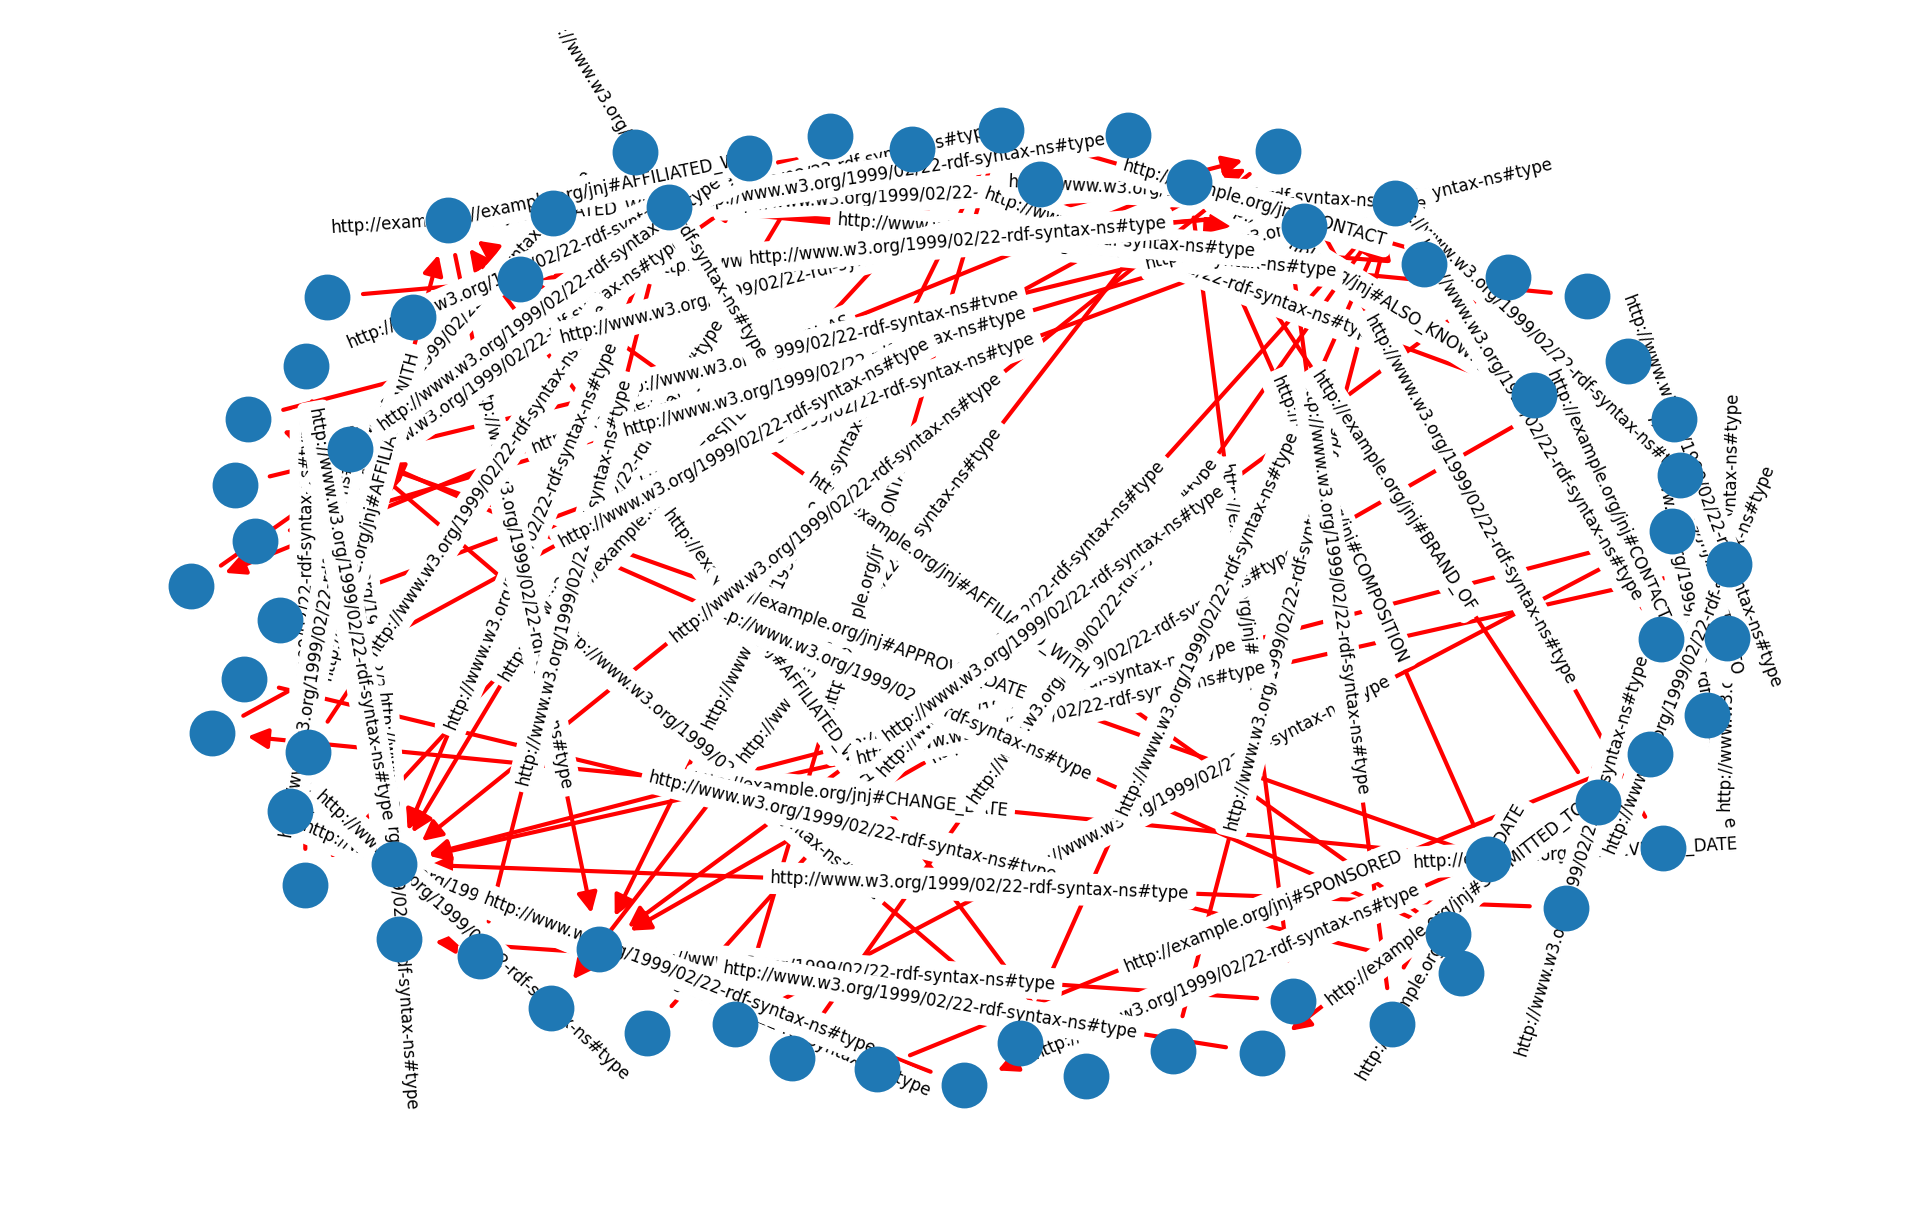

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.DiGraph()
G.add_edges_from((source, target, {'relation': relation}) for source, relation, target in g.triples((None,None,None)))

# Plot the graph
plt.figure(figsize=(8,5), dpi=300)
pos = nx.spring_layout(G, k=3, seed=0)

nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G, pos, edge_color='red')
#nx.draw_networkx_labels(G, pos, font_size=8)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=4)

# Display the plot
plt.axis('off')
plt.show()